<h1 style="color:blue; text-align:center;""> Lecture 33 </h1>
<hr style="height:5px;border-width:0;color:blue;background-color:blue">

## Neural Networks - Multilayer Perceptron

### Imports

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

2023-07-27 09:06:17.395668: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-27 09:06:17.395716: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Seeding

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

### Data

In [3]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [4]:
dataset.shape

(768, 9)

In [5]:
# split into Feature-set (X) and Label/Trget/output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [6]:
X.shape

(768, 8)

In [7]:
Y.shape

(768,)

In [8]:
Y.ndim

1

In [9]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [10]:
X[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

### Model Defining

- Models in Keras are defined as a sequence of layers.
- There are three ways to create Keras models:
  * Sequential Model
  * Model Subclassing
  * Functional API
  * https://keras.io/api/models/
- We create a Sequential model and add layers one at a time until we are happy with our network topology.
- The first thing to get right is to ensure the input layer has the right number of inputs i.e. In this case, X is (768, 8) that is, it has 8 features.
- So the input_dimension is set to 8 in the first layer


- How do we know the number of layers to use and their types? - By trial and error. 

- Fully Connected Layers: Defined by using DENSE class.
- Initialization method: kernel_initializer='uniform' - It describes how we want to initialize the network weights. Uniform means a small random number generated from a uniform distribution. It is between 0 and 0.05 (Default in keras).
- Activation Function: ReLu and first two layers and Sigmoid on the last layer. In older practices, tanh or sigmoid was used but these days ReLu is preffered.

In [11]:
# create model
model = Sequential()
model.add(Dense(units=12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

2023-07-27 09:22:09.251400: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-27 09:22:09.251448: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-27 09:22:09.251480: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tron): /proc/driver/nvidia/version does not exist
2023-07-27 09:22:09.251922: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Model Compilation

- Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as TensorFlow.
- The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware.
- When compiling, some additional properties are required to be specified to train the network such as:
    - Loss function = loss = binary_crossentropy
    - Solver/Optimizer = adam
    - metrics = for evaluaiton purposes

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


### Fit the Model

- The training process will run for a fixed number of iterations through the dataset called epochs i.e. nb_epoch
- We can also set the number of instances that are evaluated before a weight update in the network is performed called the batch size and set using the batch size argument.
- 

In [ ]:
model.fit(X, Y, epochs=50, batch_size=10)

In [ ]:
scores = model.evaluate(X, Y)
scores

In [ ]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

### Validation Split

- Keras can separate a portion of your training data into a validation dataset and evaluate the performance of your model on that validation dataset each epoch.
- validation split argument is set in fit method for this purpose.
- validation split value is between 0 and 1.

In [ ]:
model.fit(X, Y, epochs=150, batch_size=10, validation_split=0.1)

### Splits
- Test-Train with Validation
- Test: for virgin-data (unseen)
- Validation: testing during the training after each epoch

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [29]:
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
# Fit the model - with validation split
model.fit(X_train, y_train, validation_split=0.1, epochs=150, batch_size=10)

Epoch 1/150
56/56 [==============================] - 1s 6ms/step - loss: 0.6842 - accuracy: 0.6540 - val_loss: 0.6866 - val_accuracy: 0.5968
Epoch 2/150
56/56 [==============================] - 0s 4ms/step - loss: 0.6636 - accuracy: 0.6630 - val_loss: 0.6893 - val_accuracy: 0.5968
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.6630 - val_loss: 0.6848 - val_accuracy: 0.5968
Epoch 4/150
56/56 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6558 - val_loss: 0.6839 - val_accuracy: 0.5968
Epoch 5/150
56/56 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.6667 - val_loss: 0.6653 - val_accuracy: 0.6129
Epoch 6/150
56/56 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.6649 - val_loss: 0.6705 - val_accuracy: 0.6129
Epoch 7/150
56/56 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.6667 - val_loss: 0.6605 - val_accuracy: 0.6129
Epoch 8/150
5

Epoch 59/150
56/56 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.7138 - val_loss: 0.6147 - val_accuracy: 0.6935
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.5416 - accuracy: 0.7065 - val_loss: 0.6148 - val_accuracy: 0.6774
Epoch 61/150
56/56 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.7428 - val_loss: 0.6074 - val_accuracy: 0.7097
Epoch 62/150
56/56 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7156 - val_loss: 0.6289 - val_accuracy: 0.6452
Epoch 63/150
56/56 [==============================] - 0s 3ms/step - loss: 0.5459 - accuracy: 0.7283 - val_loss: 0.6038 - val_accuracy: 0.7419
Epoch 64/150
56/56 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.7101 - val_loss: 0.5991 - val_accuracy: 0.7258
Epoch 65/150
56/56 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.7228 - val_loss: 0.6016 - val_accuracy: 0.7581
Epoch 

56/56 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.7428 - val_loss: 0.5747 - val_accuracy: 0.7419
Epoch 117/150
56/56 [==============================] - 0s 4ms/step - loss: 0.5106 - accuracy: 0.7264 - val_loss: 0.6098 - val_accuracy: 0.6935
Epoch 118/150
56/56 [==============================] - 0s 5ms/step - loss: 0.5059 - accuracy: 0.7409 - val_loss: 0.5729 - val_accuracy: 0.7581
Epoch 119/150
56/56 [==============================] - 0s 3ms/step - loss: 0.5060 - accuracy: 0.7536 - val_loss: 0.5690 - val_accuracy: 0.7581
Epoch 120/150
56/56 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.7391 - val_loss: 0.5725 - val_accuracy: 0.7581
Epoch 121/150
56/56 [==============================] - 0s 3ms/step - loss: 0.5031 - accuracy: 0.7500 - val_loss: 0.5642 - val_accuracy: 0.7419
Epoch 122/150
56/56 [==============================] - 0s 3ms/step - loss: 0.5043 - accuracy: 0.7409 - val_loss: 0.5783 - val_accuracy: 0.7419
Epoch 123/150

In [30]:
# On test test
prediction =  model.predict(X_test)
prediction

array([[0.0425005 ],
       [0.62972367],
       [0.06301394],
       [0.18379906],
       [0.3346761 ],
       [0.545433  ],
       [0.06625932],
       [0.49742988],
       [0.6912948 ],
       [0.2514456 ],
       [0.7346288 ],
       [0.01528293],
       [0.4589619 ],
       [0.8243148 ],
       [0.21507064],
       [0.2264831 ],
       [0.10339203],
       [0.22606832],
       [0.12882113],
       [0.18069318],
       [0.2764929 ],
       [0.16026068],
       [0.7852293 ],
       [0.30811626],
       [0.10103565],
       [0.1611866 ],
       [0.13093615],
       [0.40695342],
       [0.41869116],
       [0.26310003],
       [0.37442014],
       [0.15987965],
       [0.21901059],
       [0.4296844 ],
       [0.00934619],
       [0.33667582],
       [0.41277793],
       [0.1403152 ],
       [0.68877816],
       [0.52105814],
       [0.60537034],
       [0.672892  ],
       [0.24254292],
       [0.07476613],
       [0.3727173 ],
       [0.18976763],
       [0.320742  ],
       [0.217

In [31]:
import numpy as np
threshold = 0.5
prediction = np.where(prediction > threshold, 1,0)

In [32]:
prediction[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [33]:
from sklearn.metrics import classification_report as cr

In [36]:
report = cr(y_true=y_test, y_pred=prediction, zero_division=1)
print(report)

              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84        97
         1.0       0.87      0.46      0.60        57

    accuracy                           0.77       154
   macro avg       0.81      0.71      0.72       154
weighted avg       0.79      0.77      0.75       154



In [39]:
zero = 0
one = 0
for i in Y:
    if i==0:
        zero = zero + 1
    else:
        one = one + 1
print(zero)
print(one)

500
268


In [34]:
from sklearn.metrics import accuracy_score

In [35]:
acc_score = accuracy_score(y_true=y_test, y_pred=prediction)
acc_score

0.7727272727272727

#### K-Fold Cross Validation

In [15]:
from sklearn.model_selection import StratifiedKFold

In [16]:
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [17]:
print(kfold.n_splits)

10


In [18]:
# kfold.split returns a generator object - that is why it is made to run in a loop
for train, test in kfold.split(X, Y):
    print(train)
    print(test)
    break

[  0   1   2   5   6   7   8   9  10  11  12  13  14  15  16  17  19  20
  21  22  23  24  26  27  28  29  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  65  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 179 180 182 183 184 186 187 188 189 190 191 193
 194 195 196 197 198 199 200 201 203 204 205 206 207 208 209 210 211 213
 214 215 216 217 218 220 222 223 224 225 226 228 229 230 231 232 233 234
 235 236 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 258 259 260 261 262 263 264 265 266 26

- on each run/fold we need to redefine the model

In [19]:
cross_valid_scores = []
for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' ))
    model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
    model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    # Fit the model
    model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cross_valid_scores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cross_valid_scores), numpy.std(cross_valid_scores)))

accuracy: 79.22%
accuracy: 79.22%
accuracy: 75.32%
accuracy: 80.52%
accuracy: 68.83%
accuracy: 63.64%
accuracy: 77.92%
accuracy: 76.62%
accuracy: 76.32%
accuracy: 81.58%
75.92% (+/- 5.30%)


### Multi-class Classification

In [40]:
# Multiclass Classification with the Iris Flowers Dataset
import pandas
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [41]:
# load dataset
dataframe = pandas.read_csv("iris.csv", header=None)
dataframe.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [45]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [46]:
dummy_y[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

----------
- Because we used a one-hot encoding, the output layer must create 3 output values, one for each class.
----------

In [47]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=4, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(6, input_dim=4, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(3, kernel_initializer= 'uniform' , activation= 'softmax' ))
# Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [48]:
history = model.fit(X, dummy_y, epochs=75, batch_size=10, validation_split=0.1, shuffle=True).history

Epoch 1/75
14/14 [==============================] - 1s 18ms/step - loss: 1.0982 - accuracy: 0.3704 - val_loss: 1.1082 - val_accuracy: 0.0000e+00
Epoch 2/75
14/14 [==============================] - 0s 7ms/step - loss: 1.0965 - accuracy: 0.3704 - val_loss: 1.1144 - val_accuracy: 0.0000e+00
Epoch 3/75
14/14 [==============================] - 0s 5ms/step - loss: 1.0945 - accuracy: 0.3704 - val_loss: 1.1217 - val_accuracy: 0.0000e+00
Epoch 4/75
14/14 [==============================] - 0s 5ms/step - loss: 1.0901 - accuracy: 0.3704 - val_loss: 1.1259 - val_accuracy: 0.0000e+00
Epoch 5/75
14/14 [==============================] - 0s 5ms/step - loss: 1.0823 - accuracy: 0.3704 - val_loss: 1.1324 - val_accuracy: 0.0000e+00
Epoch 6/75
14/14 [==============================] - 0s 5ms/step - loss: 1.0700 - accuracy: 0.3704 - val_loss: 1.1394 - val_accuracy: 0.0000e+00
Epoch 7/75
14/14 [==============================] - 0s 5ms/step - loss: 1.0495 - accuracy: 0.3926 - val_loss: 1.1443 - val_accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 0.1812 - accuracy: 0.9704 - val_loss: 0.2950 - val_accuracy: 1.0000
Epoch 59/75
14/14 [==============================] - 0s 5ms/step - loss: 0.1778 - accuracy: 0.9481 - val_loss: 0.3803 - val_accuracy: 0.9333
Epoch 60/75
14/14 [==============================] - 0s 5ms/step - loss: 0.1699 - accuracy: 0.9704 - val_loss: 0.2669 - val_accuracy: 1.0000
Epoch 61/75
14/14 [==============================] - 0s 4ms/step - loss: 0.1641 - accuracy: 0.9704 - val_loss: 0.3354 - val_accuracy: 0.9333
Epoch 62/75
14/14 [==============================] - 0s 5ms/step - loss: 0.1601 - accuracy: 0.9481 - val_loss: 0.3237 - val_accuracy: 0.9333
Epoch 63/75
14/14 [==============================] - 0s 5ms/step - loss: 0.1526 - accuracy: 0.9630 - val_loss: 0.2567 - val_accuracy: 1.0000
Epoch 64/75
14/14 [==============================] - 0s 5ms/step - loss: 0.1481 - accuracy: 0.9704 - val_loss: 0.2570 - val_accuracy: 0.9333
Epoch 65/75
14/14 [======

In [49]:
# history is a dictionary
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [50]:
history['accuracy']

[0.37037035822868347,
 0.37037035822868347,
 0.37037035822868347,
 0.37037035822868347,
 0.37037035822868347,
 0.37037035822868347,
 0.39259257912635803,
 0.40740740299224854,
 0.4444444477558136,
 0.5185185074806213,
 0.5703703761100769,
 0.5629629492759705,
 0.6962962746620178,
 0.7037037014961243,
 0.8370370268821716,
 0.9333333373069763,
 0.8296296000480652,
 0.7851851582527161,
 0.7777777910232544,
 0.8148148059844971,
 0.8296296000480652,
 0.8814814686775208,
 0.8740741014480591,
 0.9259259104728699,
 0.9259259104728699,
 0.9259259104728699,
 0.9111111164093018,
 0.7629629373550415,
 0.7407407164573669,
 0.7407407164573669,
 0.7407407164573669,
 0.7481481432914734,
 0.7481481432914734,
 0.7407407164573669,
 0.7555555701255798,
 0.7851851582527161,
 0.7629629373550415,
 0.8074073791503906,
 0.8814814686775208,
 0.8814814686775208,
 0.8666666746139526,
 0.9111111164093018,
 0.8962963223457336,
 0.9407407641410828,
 0.9481481313705444,
 0.9407407641410828,
 0.9481481313705444,
 0.94

#### Visualizing the Training

In [ ]:
### Plotting history

In [ ]:
# !python -m pip install plot-keras-history

In [51]:
from plot_keras_history import plot_history
import matplotlib.pyplot as plt

(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

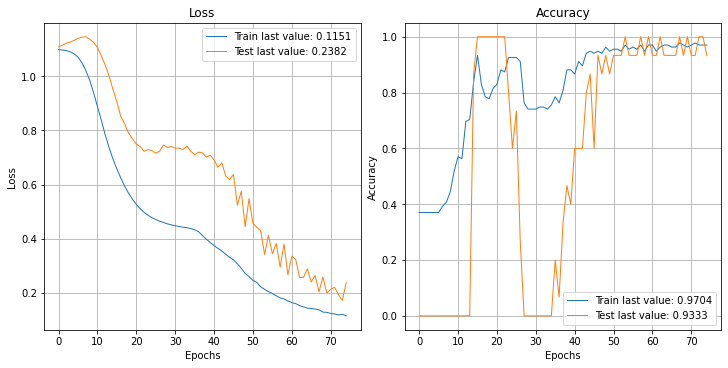

In [52]:
plot_history(history)